In [23]:
%%capture
from tqdm import tqdm
from convokit import Corpus, Speaker, Utterance
from collections import defaultdict
import pandas as pd
import pprint as pp
from IPython.display import display
from modules.DataPreprocesser import DataPreprocesser
from modules import CorpusUtils as corp
import torch
import matplotlib.pyplot as plt
import pandas as pd

# Add the src directory to the path
import sys
import os

# Add the src
sys.path.append(os.path.abspath("."))
import import_ipynb

#from modules.CorpusUtils import CorpusUtils

# Corpus Converter

This notebook takled the pre-processed dataframes and converts it to a Corpus Object

# Verifying the Corpus Dataframes

### Final Filtered Conversations and Utterances

In [4]:
filepath = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/preprocessed_dyads.csv"

final_data = DataPreprocesser(filepath)
final_data.getDataframe()

2107


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'


,b_country,b_RankBuy_1,b_RankBuy_2,b_RankBuy_3,b_RankBuy_4,b_Tact_1,b_Tact_2,b_Tact_3,b_Tact_4,b_Tact_5,...,s_AI4u,s_PlayAI.1,s_AI-cues.1,is_AI,formattedChat,b_insight,s_insight,flag_speaker,dispute_outcome,parsed_dialog
0,187.0,40.0,10.0,31.0,19.0,3.0,1.0,2.0,NaN,1.0,...,NaN,NaN,NaN,False,1699388451 Buyer: Hi there! I believe I receiv...,3.0,1.0,3,0,"[{'timestamp': 1699388451, 'speaker': 'Buyer',..."
1,187.0,50.0,8.0,30.0,12.0,2.0,5.0,4.0,NaN,4.0,...,NaN,NaN,NaN,False,1699389969 Buyer: Hello. I need you to make th...,2.0,6.0,3,0,"[{'timestamp': 1699389969, 'speaker': 'Buyer',..."
2,187.0,80.0,0.0,20.0,0.0,1.0,3.0,4.0,NaN,4.0,...,NaN,NaN,NaN,False,1699392080 Buyer: I would prefer a refund as t...,2.0,5.0,1,0,"[{'timestamp': 1699392080, 'speaker': 'Buyer',..."
3,187.0,40.0,30.0,20.0,10.0,2.0,3.0,3.0,NaN,4.0,...,NaN,NaN,NaN,False,1699392404 Buyer: I didn't receive the correct...,NaN,NaN,3,0,"[{'timestamp': 1699392404, 'speaker': 'Buyer',..."
4,187.0,90.0,5.0,5.0,0.0,1.0,4.0,2.0,NaN,3.0,...,NaN,NaN,NaN,False,1699393461 Buyer: Hello! I need you to refund ...,3.0,0.0,1,0,"[{'timestamp': 1699393461, 'speaker': 'Buyer',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,161.0,15.0,20.0,25.0,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,because he responded genuinely,False,1718875387 Buyer: Hello i requesting for a par...,2.0,6.0,3,0,"[{'timestamp': 1718875387, 'speaker': 'Buyer',..."
2103,137.0,90.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,how he responded,False,"1718875522 Buyer: Hello, I would like to recei...",0.0,1.0,2,1,"[{'timestamp': 1718875522, 'speaker': 'Buyer',..."
2104,185.0,75.0,0.0,25.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,"1718875699 Buyer: I would like a refund, the b...",NaN,NaN,1,0,"[{'timestamp': 1718875699, 'speaker': 'Buyer',..."
2105,161.0,35.0,20.0,30.0,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,sentences were short and minimal information g...,False,"1718876074 Buyer: Hey, I received my order and...",4.0,3.0,3,0,"[{'timestamp': 1718876074, 'speaker': 'Buyer',..."


In [3]:
final_data.getUtterancesDF()

,timestamp,speaker,message,uttidx,speaker_id,is_AI,row_idx,match_idx,Case Match Type,convo_len
0,1699388451.0,Buyer,Hi there! I believe I received the wrong jerse...,0,Buyer_0,False,0,False,None,14
1,1699388553.0,Seller,Good afternoon! I looked over your purchase re...,1,Seller_0,False,0,False,None,14
2,1699388719.0,Buyer,I appreciate your timely response! I can under...,2,Buyer_0,False,0,False,None,14
3,1699388896.0,Seller,Of course! We try to reach all our customers a...,3,Seller_0,False,0,False,None,14
4,1699389108.0,Buyer,"I can return the generic jersey, no problem! I...",4,Buyer_0,False,0,False,None,14
...,...,...,...,...,...,...,...,...,...,...
27494,1718879513.0,Buyer,"Cool no problem, so just to clarify, you will ...",6,Buyer_2106,False,2106,False,None,11
27495,1718879641.0,Seller,I will refund you after you have sent the item...,7,Seller_2106,False,2106,False,None,11
27496,1718879680.0,Buyer,"Great thanks for this outcome, enjoy the rest ...",8,Buyer_2106,False,2106,False,None,11
27497,1718879753.0,Seller,"Submitted agreement: Buyer gets full refund, s...",9,Seller_2106,False,2106,False,None,11


### Corpus-converted Dataframes

In [4]:
test_utterances = corp.buildUtteranceDF(final_data.getUtterancesDF())
display(test_utterances)
#corp.setUtteranceMetadata(["dispute_outcome"])
test_spk = corp.buildSpeakerDF(final_data.getUtterancesDF())
display(test_spk)
test_conv = corp.buildConvoDF(final_data.getDataframe())
display(test_conv)

,id,speaker,conversation_id,reply_to,timestamp,text
0,utt0_con0,Buyer_0,utt0_con0,None,1699388451.0,Hi there! I believe I received the wrong jerse...
1,utt1_con0,Seller_0,utt0_con0,utt0_con0,1699388553.0,Good afternoon! I looked over your purchase re...
2,utt2_con0,Buyer_0,utt0_con0,utt1_con0,1699388719.0,I appreciate your timely response! I can under...
3,utt3_con0,Seller_0,utt0_con0,utt2_con0,1699388896.0,Of course! We try to reach all our customers a...
4,utt4_con0,Buyer_0,utt0_con0,utt3_con0,1699389108.0,"I can return the generic jersey, no problem! I..."
...,...,...,...,...,...,...
27494,utt6_con2106,Buyer_2106,utt0_con2106,utt5_con2106,1718879513.0,"Cool no problem, so just to clarify, you will ..."
27495,utt7_con2106,Seller_2106,utt0_con2106,utt6_con2106,1718879641.0,I will refund you after you have sent the item...
27496,utt8_con2106,Buyer_2106,utt0_con2106,utt7_con2106,1718879680.0,"Great thanks for this outcome, enjoy the rest ..."
27497,utt9_con2106,Seller_2106,utt0_con2106,utt8_con2106,1718879753.0,"Submitted agreement: Buyer gets full refund, s..."


,id
0,Buyer_0
1,Seller_0
2,Buyer_1
3,Seller_1
4,Buyer_2
...,...
4210,Seller_2104
4211,Buyer_2105
4212,Seller_2105
4213,Buyer_2106


,id
0,0
1,1
2,2
3,3
4,4
...,...
2102,2102
2103,2103
2104,2104
2105,2105


# Buyer vs. Seller Stats:

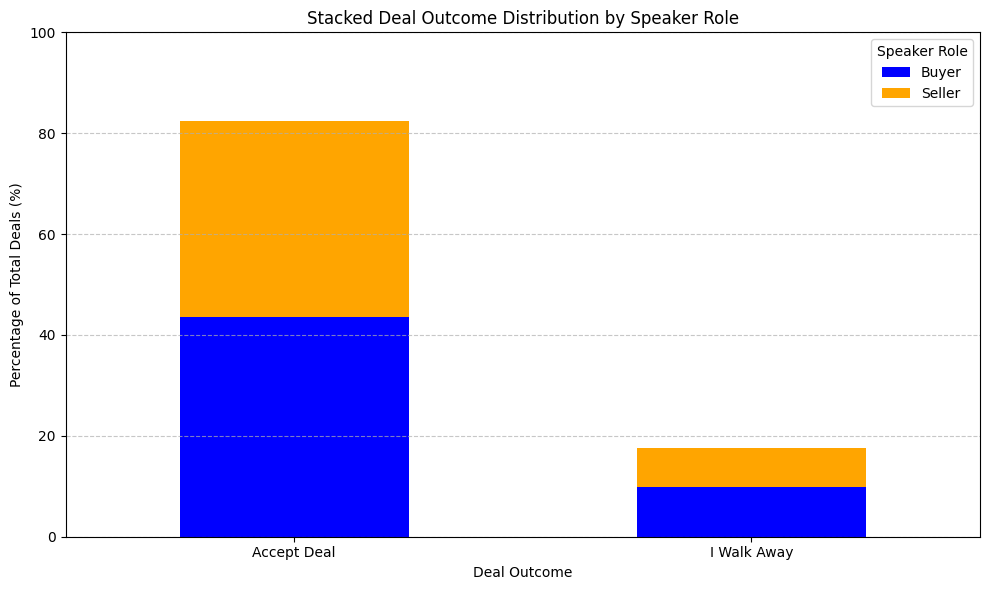

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Mock data to simulate original flag_speaker_counts
flag_speaker_counts_accept = pd.Series({
    "Buyer - Accept Deal": 918,
    "Seller - Accept Deal": 818
})
flag_speaker_counts_reject = pd.Series({
    "Buyer - I Walk Away": 206,
    "Seller - I Walk Away": 165
})

# Calculate total deals
total_accept_deals = flag_speaker_counts_accept.sum()
total_reject_deals = flag_speaker_counts_reject.sum()
total_deals = total_accept_deals + total_reject_deals

# Convert to percentage of total deals
buyer_accept_pct = (flag_speaker_counts_accept.get("Buyer - Accept Deal", 0) / total_deals) * 100
seller_accept_pct = (flag_speaker_counts_accept.get("Seller - Accept Deal", 0) / total_deals) * 100
buyer_reject_pct = (flag_speaker_counts_reject.get("Buyer - I Walk Away", 0) / total_deals) * 100
seller_reject_pct = (flag_speaker_counts_reject.get("Seller - I Walk Away", 0) / total_deals) * 100

# Create DataFrame with outcomes as index, speakers as columns
reoriented_df = pd.DataFrame({
    "Buyer": {
        "Accept Deal": buyer_accept_pct,
        "I Walk Away": buyer_reject_pct
    },
    "Seller": {
        "Accept Deal": seller_accept_pct,
        "I Walk Away": seller_reject_pct
    }
})

# Plot with desired structure
reoriented_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["blue", "orange"]
)

# Customize plot
plt.xlabel("Deal Outcome")
plt.ylabel("Percentage of Total Deals (%)")
plt.title("Stacked Deal Outcome Distribution by Speaker Role")
plt.legend(title="Speaker Role")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Creating Corpus Object

In [7]:
test_corp= corp.corpusBuilder(final_data)

27498it [00:00, 53724.86it/s]


In [7]:
test_corp.print_summary_stats()

Number of Speakers: 4214
Number of Utterances: 27498
Number of Conversations: 2107


In [8]:
display(test_corp.get_conversations_dataframe())
display(test_corp.get_utterances_dataframe())
display(test_corp.get_speakers_dataframe())

,vectors
id,
utt0_con0,[]
utt0_con1,[]
utt0_con2,[]
utt0_con3,[]
utt0_con4,[]
...,...
utt0_con2102,[]
utt0_con2103,[]
utt0_con2104,[]


,timestamp,text,speaker,reply_to,conversation_id,vectors
id,,,,,,
utt0_con0,1699388451,Hi there! I believe I received the wrong jerse...,Buyer_0,None,utt0_con0,[]
utt1_con0,1699388553,Good afternoon! I looked over your purchase re...,Seller_0,utt0_con0,utt0_con0,[]
utt2_con0,1699388719,I appreciate your timely response! I can under...,Buyer_0,utt1_con0,utt0_con0,[]
utt3_con0,1699388896,Of course! We try to reach all our customers a...,Seller_0,utt2_con0,utt0_con0,[]
utt4_con0,1699389108,"I can return the generic jersey, no problem! I...",Buyer_0,utt3_con0,utt0_con0,[]
...,...,...,...,...,...,...
utt6_con2106,1718879513,"Cool no problem, so just to clarify, you will ...",Buyer_2106,utt5_con2106,utt0_con2106,[]
utt7_con2106,1718879641,I will refund you after you have sent the item...,Seller_2106,utt6_con2106,utt0_con2106,[]
utt8_con2106,1718879680,"Great thanks for this outcome, enjoy the rest ...",Buyer_2106,utt7_con2106,utt0_con2106,[]


,vectors
id,
Buyer_0,[]
Seller_0,[]
Buyer_1,[]
Seller_1,[]
Buyer_2,[]
...,...
Seller_2104,[]
Buyer_2105,[]
Seller_2105,[]


# Testing
## Notes
- ConvoKit's Forecaster is a modular implementation of general forecasting behavior, meaning that it does not implement any specific forecasting algorithm and instead encapsulates the general behavior of iterating over a conversation and producing a forecast score upon each new comment (using some specified algorithm).
- seem to be able to use .transform() to make predicitons on corpus object if we import pre-trained CRAFT model.
- The CRAFT model needs tokenized and processed conversation data. Funciton exists in Convokit
- wiki_awry_demo: Transformers: ExpectedContextModel, Prompt Types, politeness strategies
- craft-demo-new: best model to learn since uses pre-trained Wikiconv-based model as reported in the "Trouble on the Horizon" paper

# First Step Todo

1. craft_demo_new to make predictions with forecaster using corpus object
2. How to tokenize our data to give as input to model and make predictions (no fine-tuning, just inference)
3. Where do I add conversation outcome labels?

# Adding CORPUS Metadata

### Adding Conversation Lengths as Conversation meta data

In [9]:
for convo in test_corp.iter_conversations():
    convo_len = len(convo.get_utterance_ids())  # Count utterances in the conversation
    convo.add_meta("convo_len", convo_len)      # Store as conversation-level metadata
    some_convo = test_corp.get_conversation("utt0_con0")
print("Length of conversation:", some_convo.retrieve_meta("convo_len"))

Length of conversation: 14


# Testing Predictions

### Add Conversation Labels from Final Pre-processed Dataframe as conversation metadata

In [10]:
for idx, row in final_data.getDataframe().iterrows():
    convo_id = f"utt0_con{idx}"  # generate conversation_id format from index
    label = row["dispute_outcome"]  # update if your label column is named differently
    if convo_id in test_corp.conversations:
        test_corp.get_conversation(convo_id).meta["label"] = label

### Testing Label Output

In [11]:
for convo in test_corp.iter_conversations():
    print(f"Conversation ID: {convo.id}")
    print("Metadata:", convo.meta)
    print("---")

Conversation ID: utt0_con0
Metadata: ConvoKitMeta({'convo_len': 14, 'label': 1})
---
Conversation ID: utt0_con1
Metadata: ConvoKitMeta({'convo_len': 14, 'label': 1})
---
Conversation ID: utt0_con2
Metadata: ConvoKitMeta({'convo_len': 13, 'label': 1})
---
Conversation ID: utt0_con3
Metadata: ConvoKitMeta({'convo_len': 12, 'label': 1})
---
Conversation ID: utt0_con4
Metadata: ConvoKitMeta({'convo_len': 15, 'label': 1})
---
Conversation ID: utt0_con5
Metadata: ConvoKitMeta({'convo_len': 12, 'label': 1})
---
Conversation ID: utt0_con6
Metadata: ConvoKitMeta({'convo_len': 18, 'label': 1})
---
Conversation ID: utt0_con7
Metadata: ConvoKitMeta({'convo_len': 14, 'label': 1})
---
Conversation ID: utt0_con8
Metadata: ConvoKitMeta({'convo_len': 15, 'label': 1})
---
Conversation ID: utt0_con9
Metadata: ConvoKitMeta({'convo_len': 13, 'label': 1})
---
Conversation ID: utt0_con10
Metadata: ConvoKitMeta({'convo_len': 11, 'label': 1})
---
Conversation ID: utt0_con11
Metadata: ConvoKitMeta({'convo_len':

### Importing CRAFT Model

In [12]:
from convokit.forecaster.CRAFTModel import CRAFTModel

In [13]:
model = CRAFTModel(
    initial_weights="craft-wiki-pretrained",  # or "craft-wiki-finetuned"
    torch_device="cuda" if torch.cuda.is_available() else "cpu"
)

### Importing Forcaster Object

In [14]:
from convokit.forecaster.forecaster import Forecaster

In [15]:
# Use 'label' because we added it to conversation.meta["label"]
forecaster = Forecaster(
    forecaster_model=model,
    labeler="label",  # uses conversation.meta["label"]
    forecast_attribute_name="prediction",
    forecast_prob_attribute_name="pred_score"
)

### Use only last utterance to make prediciton
- Change is_last_context to actually do forecasting

### Transform Coprus (no fine-tuning)
- Context_selector  in transform controls how predictions are made. Line-by-line -> temporally
- Setting it to last_context means doing it as a classification problem

In [16]:
# This will train and predict (if pretrained, "fit" is actually just transformation)
test_corp = forecaster.transform(test_corp)

Processed 27498 context tuples for model evaluation
Loading saved parameters...
Building encoders, decoder, and classifier...
Models built and ready to go!
Iteration: 1; Percent complete: 0.2%
Iteration: 2; Percent complete: 0.5%
Iteration: 3; Percent complete: 0.7%
Iteration: 4; Percent complete: 0.9%
Iteration: 5; Percent complete: 1.2%
Iteration: 6; Percent complete: 1.4%
Iteration: 7; Percent complete: 1.6%
Iteration: 8; Percent complete: 1.9%
Iteration: 9; Percent complete: 2.1%
Iteration: 10; Percent complete: 2.3%
Iteration: 11; Percent complete: 2.6%
Iteration: 12; Percent complete: 2.8%
Iteration: 13; Percent complete: 3.0%
Iteration: 14; Percent complete: 3.3%
Iteration: 15; Percent complete: 3.5%
Iteration: 16; Percent complete: 3.7%
Iteration: 17; Percent complete: 4.0%
Iteration: 18; Percent complete: 4.2%
Iteration: 19; Percent complete: 4.4%
Iteration: 20; Percent complete: 4.7%
Iteration: 21; Percent complete: 4.9%
Iteration: 22; Percent complete: 5.1%
Iteration: 23; Pe

### Look at the predictions

In [17]:
#after running transform(...)
print(forecast_df.head())
forecast_df['forecast_prob'].hist(bins=50)

from sklearn.metrics import confusion_matrix, classification_report

# build y_true by looking up your conversation-level 'label'
y_true = [
    test_corp
      .get_utterance(utt_id)
      .get_conversation()
      .meta['label']
    for utt_id in forecast_df.index
]
y_pred = forecast_df['forecast'].tolist()

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
print(model._decision_threshold)

NameError: name 'forecast_df' is not defined

Positive class rate: 81.84%


Text(0, 0.5, 'Precision')

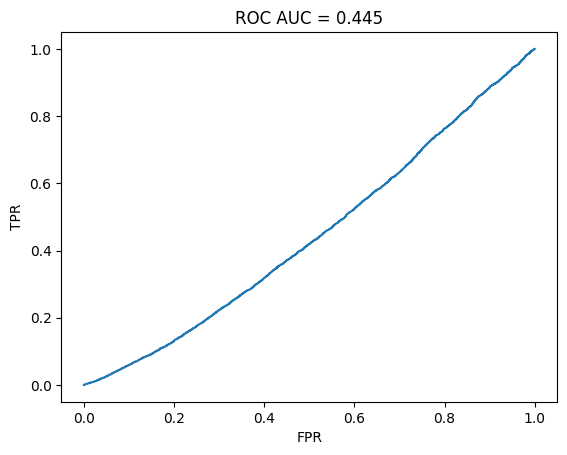

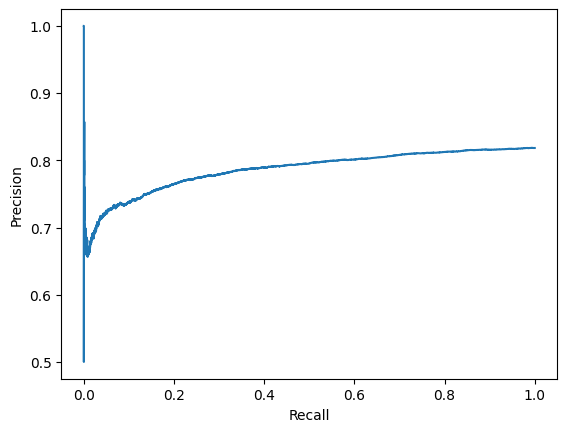

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np

y_true = [test_corp.get_utterance(utt_id).get_conversation().meta['label'] for utt_id in forecast_df.index]                       # as above
y_scores = forecast_df['forecast_prob']
positive_rate = np.mean(y_true)
print(f"Positive class rate: {positive_rate:.2%}")

fpr, tpr, _ = roc_curve(y_true, y_scores)
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# plot ROC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title(f"ROC AUC = {auc(fpr, tpr):.3f}")

# plot PR
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall"); plt.ylabel("Precision")


Random‐chance PR baseline: In a precision‑recall plot, the horizontal line at your positive rate is the “random” baseline—any real model should beat that.
- our positive rate is at 81%, so the PR curve lies there as recall (positive prediciton rate)



# Comparing Corpora

### Imports

In [1]:
from convokit import Corpus, download
cmv_corpus = Corpus(filename=download("conversations-gone-awry-cmv-corpus"))
wiki_corpus = Corpus(filename=download("conversations-gone-awry-corpus"))


Dataset already exists at /Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convokit_datasets/conversations-gone-awry-cmv-corpus
Dataset already exists at /Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convokit_datasets/conversations-gone-awry-corpus


In [8]:
corpus_kodis = test_corp

In [19]:
def add_convo_labels(corpus, final_data):
    for idx, row in final_data.getDataframe().iterrows():
        convo_id = f"utt0_con{idx}"  # generate conversation_id format from index
        label = row["dispute_outcome"]  # update if your label column is named differently
        if convo_id in corpus.conversations:
            corpus.get_conversation(convo_id).meta["label"] = label

add_convo_labels(corpus_kodis, final_data)

In [52]:
convo = next(cmv_corpus.iter_conversations())
cmv_corpus_convo_df = cmv_corpus.get_conversations_dataframe()
wiki_corpus_convo_df = wiki_corpus.get_conversations_dataframe()
cmv_corpus_convo_df = cmv_corpus_convo_df[cmv_corpus_convo_df['meta.split'] == 'test']
wiki_corpus_convo_df = wiki_corpus_convo_df[wiki_corpus_convo_df['meta.split'] == 'test']
display(wiki_corpus_convo_df)


,vectors,meta.page_title,meta.page_id,meta.pair_id,meta.conversation_has_personal_attack,meta.verified,meta.pair_verified,meta.annotation_year,meta.split
id,,,,,,,,,
240149353.16332.16332,[],User talk:Orangemike,10168078,241131342.18768.18523,False,True,True,2018,test
241131342.18768.18523,[],User talk:Orangemike,10168078,240149353.16332.16332,True,True,True,2018,test
463673734.2155.2155,[],Talk:Zainab Masood,11313584,465151872.2417.2417,False,True,True,2018,test
465151872.2417.2417,[],Talk:Zainab Masood,11313584,463673734.2155.2155,True,True,True,2018,test
15835089.3408.3408,[],Talk:Mezmerize (album),1219116,15832773.3019.3019,False,True,True,2018,test
...,...,...,...,...,...,...,...,...,...
432489216.33831.33831,[],Talk:Hollywood Walk of Fame,962553,506936178.87121.87121,False,False,False,2019,test
33982772.724.724,[],Talk:St Michael's Mount,979044,651692610.869.869,True,False,False,2019,test
651692610.869.869,[],Talk:St Michael's Mount,979044,33982772.724.724,False,False,False,2019,test


In [51]:
def print_conversation_if_test(corpus, convo_id):
    """
    Print all utterances in a Reddit-CMV conversation, but only if it's in the 'test' split.

    Args:
      corpus: a ConvoKit Corpus
      convo_id: the ID of the conversation to print
    """
    conv = corpus.get_conversation(convo_id)
    if conv is None:
        print(f"No conversation with id {convo_id}")
        return
    # Only proceed if this convo is in the 'test' split
    if conv.meta.get("split") != "test":
        print(f"Conversation {convo_id} is not in the test set (split={conv.meta.get('split')}).")
        return

    # Otherwise, print it
    for utt_id in conv.get_utterance_ids():
        utt = corpus.get_utterance(utt_id)
        print(f"[{utt.speaker.id} @ {utt.timestamp}] {utt.text}\n")

print_conversation_if_test(cmv_corpus, "cv7g1kl")

[LikeAScientist @ 1442709937] Are we just going to ignore Trump's anti-vaccination views? How can we ignore that?!

[bluemagic124 @ 1442793208] He says they should be spaced out, which most people think is fair.  

[LikeAScientist @ 1442794398] You can google [what he said](https://www.google.com/search?tbm=isch&amp;q=Trump%27s+anti-vaccination+views) folks, and frankly if you agree with him I have no reason to interact with you. Autism is not caused by vaccinations. [Also, don't give me that all at once crap.](http://www.cdc.gov/vaccines/schedules/easy-to-read/child.html)

[bluemagic124 @ 1442795342] I watched the 2nd republican debate, and even your link to google confirms what I said about Trump's view, that is, he think's that the doses should be spread out instead of given in "1 massive dose."  No study has shown a correlation b/w autism and large doses of vaccinations, but it's not like he's calling for the end of vaccinations.



### All Plots

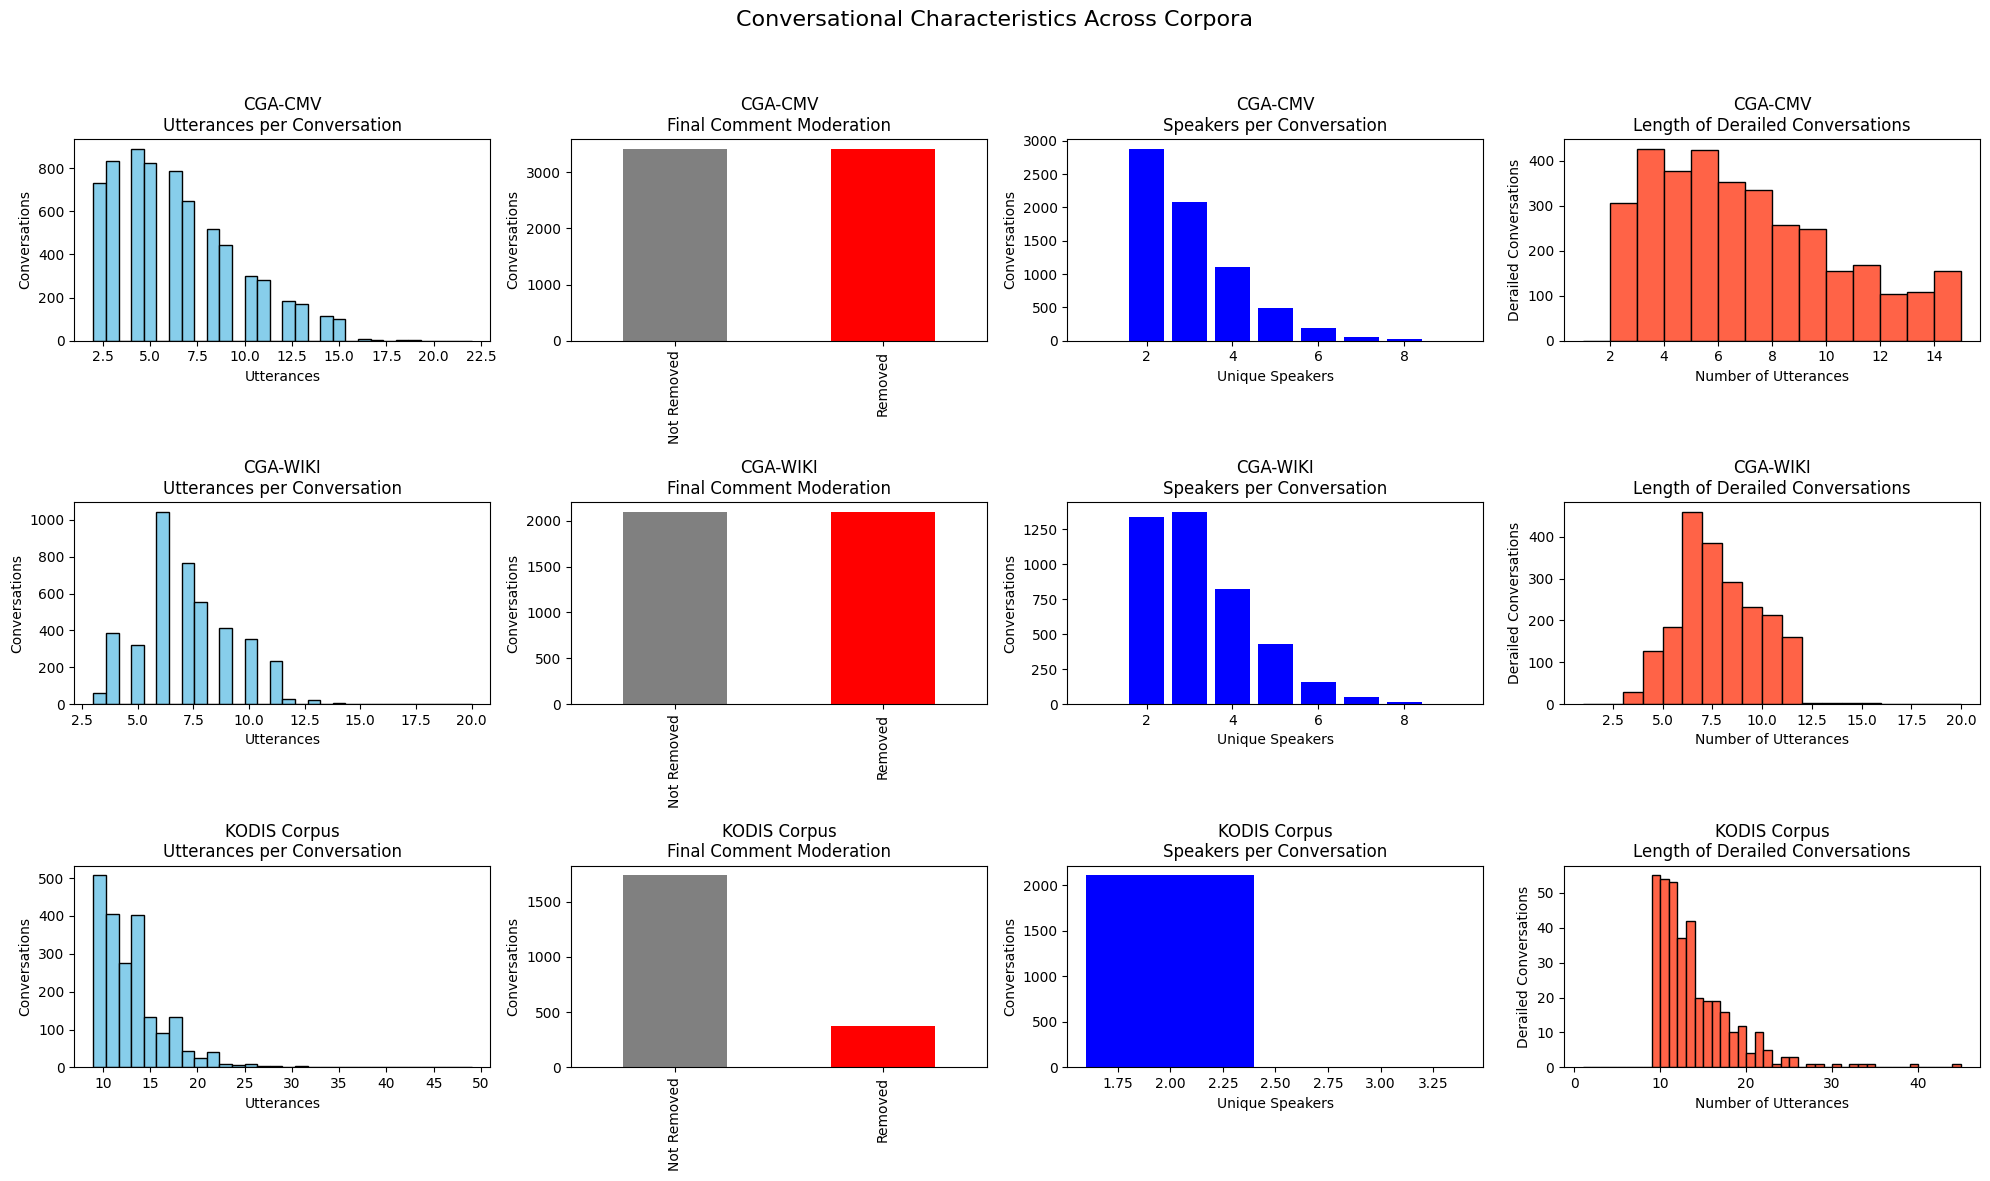

In [27]:
# Group all corpora
corpora = {
    "CGA-CMV": cmv_corpus,
    "CGA-WIKI": wiki_corpus,
    "KODIS Corpus": test_corp
}

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(len(corpora), 4, figsize=(20, 12))
fig.suptitle("Conversational Characteristics Across Corpora", fontsize=16)

for i, (label, corpus) in enumerate(corpora.items()):
    if label == "CGA-WIKI":
        flag_key = "conversation_has_personal_attack"
    elif label == "CGA-CMV":
        flag_key = "has_removed_comment"
    elif label == "KODIS Corpus":
        flag_key = "label"
    else:
        raise ValueError(f"Unknown corpus label: {label}")
    # --- Plot 1: Distribution of Utterances per Conversation ---
    utterance_counts = [len(list(c.iter_utterances())) for c in corpus.iter_conversations()]
    axs[i, 0].hist(utterance_counts, bins=30, color="skyblue", edgecolor="black")
    axs[i, 0].set_title(f"{label}\nUtterances per Conversation")
    axs[i, 0].set_xlabel("Utterances")
    axs[i, 0].set_ylabel("Conversations")

    # --- Plot 2: Final Comment Moderation ---
    removed = [c.meta.get(flag_key, False) for c in corpus.iter_conversations()]
    pd.Series(removed).value_counts().sort_index().plot(kind="bar", ax=axs[i, 1], color=["gray", "red"])
    axs[i, 1].set_title(f"{label}\nFinal Comment Moderation")
    axs[i, 1].set_xticks([0, 1])
    axs[i, 1].set_xticklabels(["Not Removed", "Removed"])
    axs[i, 1].set_ylabel("Conversations")


    # --- Plot 3: Unique Speakers per Conversation ---
    speaker_count_distribution = defaultdict(int)
    for convo in corpus.iter_conversations():
        speaker_ids = {utt.speaker.id for utt in convo.iter_utterances()}
        speaker_count_distribution[len(speaker_ids)] += 1
    sorted_counts = dict(sorted(speaker_count_distribution.items()))
    axs[i, 2].bar(sorted_counts.keys(), sorted_counts.values(), color="blue")
    axs[i, 2].set_title(f"{label}\nSpeakers per Conversation")
    axs[i, 2].set_xlabel("Unique Speakers")
    axs[i, 2].set_ylabel("Conversations")


    # --- Plot 4: Lengths of Derailed Conversations ---
    # pick the right meta-key for “derailed” depending on which corpus we’re in
    
    # now collect the conversation lengths where that flag is True
    derailed_lengths = [
        len(list(convo.iter_utterances()))
        for convo in corpus.iter_conversations()
        if convo.meta.get(flag_key, False)
    ]
    axs[i, 3].hist(
        derailed_lengths,
        bins=range(1, max(derailed_lengths) + 1 if derailed_lengths else 2),
        color="tomato",
        edgecolor="black"
    )
    axs[i, 3].set_title(f"{label}\nLength of Derailed Conversations")
    axs[i, 3].set_xlabel("Number of Utterances")
    axs[i, 3].set_ylabel("Derailed Conversations")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


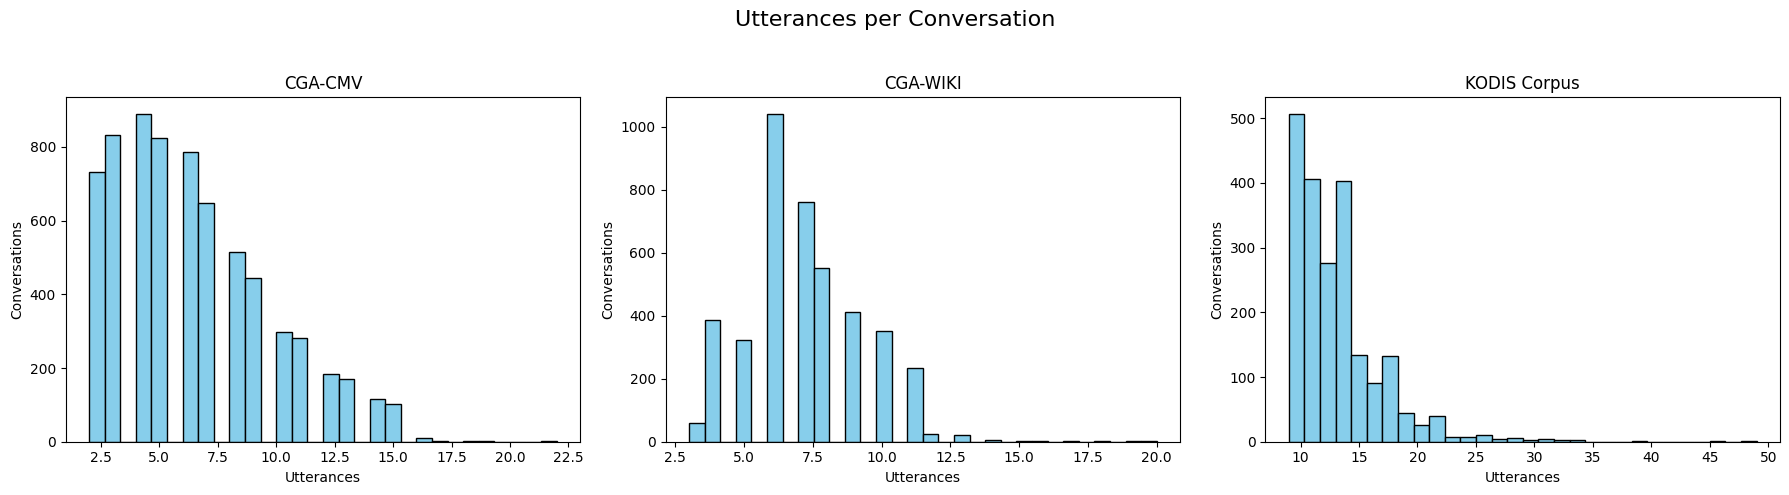

In [ ]:
fig, axs = plt.subplots(1, len(corpora), figsize=(6 * len(corpora), 5))
fig.suptitle("Utterances per Conversation", fontsize=16)

for i, (label, corpus) in enumerate(corpora.items()):
    utterance_counts = [len(list(c.iter_utterances())) for c in corpus.iter_conversations()]
    axs[i].hist(utterance_counts, bins=30, color="skyblue", edgecolor="black")
    axs[i].set_title(f"{label}")
    axs[i].set_xlabel("Utterances")
    axs[i].set_ylabel("Conversations")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


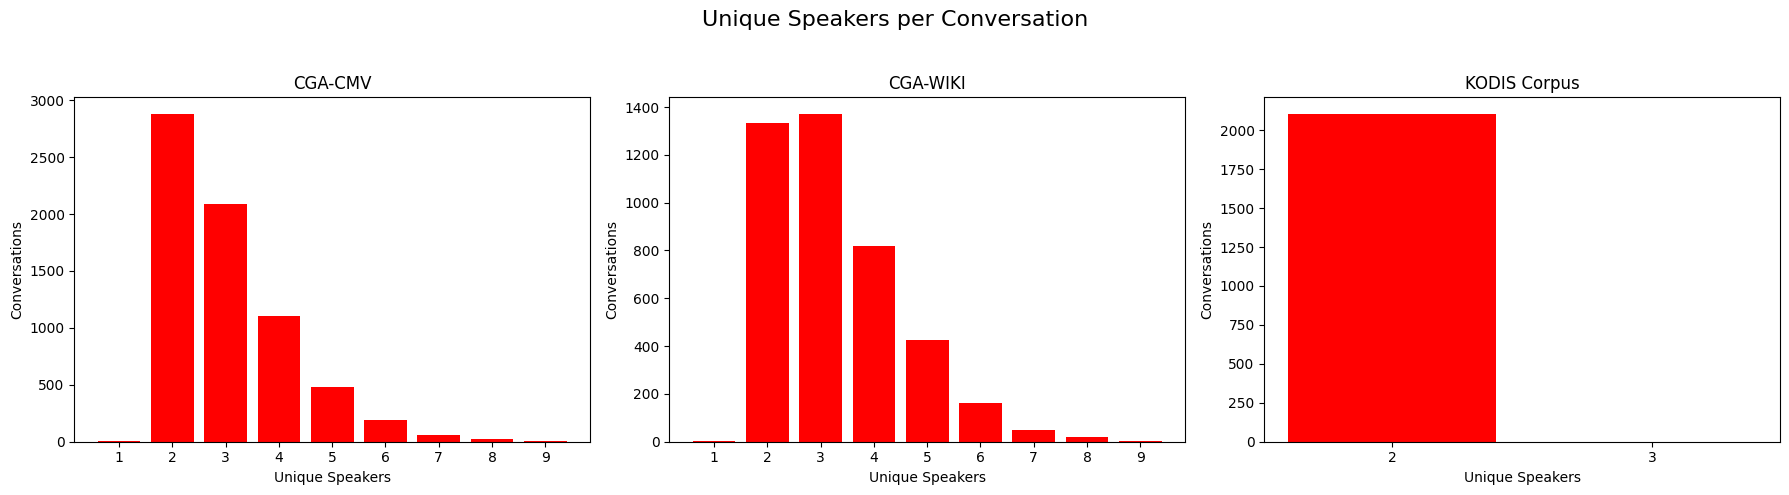

In [ ]:
fig, axs = plt.subplots(1, len(corpora), figsize=(6 * len(corpora), 5))
fig.suptitle("Unique Speakers per Conversation", fontsize=16)

for i, (label, corpus) in enumerate(corpora.items()):
    speaker_count_distribution = defaultdict(int)
    for convo in corpus.iter_conversations():
        speaker_ids = {utt.speaker.id for utt in convo.iter_utterances()}
        speaker_count_distribution[len(speaker_ids)] += 1

    sorted_counts = dict(sorted(speaker_count_distribution.items()))
    axs[i].bar(sorted_counts.keys(), sorted_counts.values(), color="red")
    axs[i].set_title(label)
    axs[i].set_xlabel("Unique Speakers")
    axs[i].set_ylabel("Conversations")
    axs[i].set_xticks(list(sorted_counts.keys()))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


4188


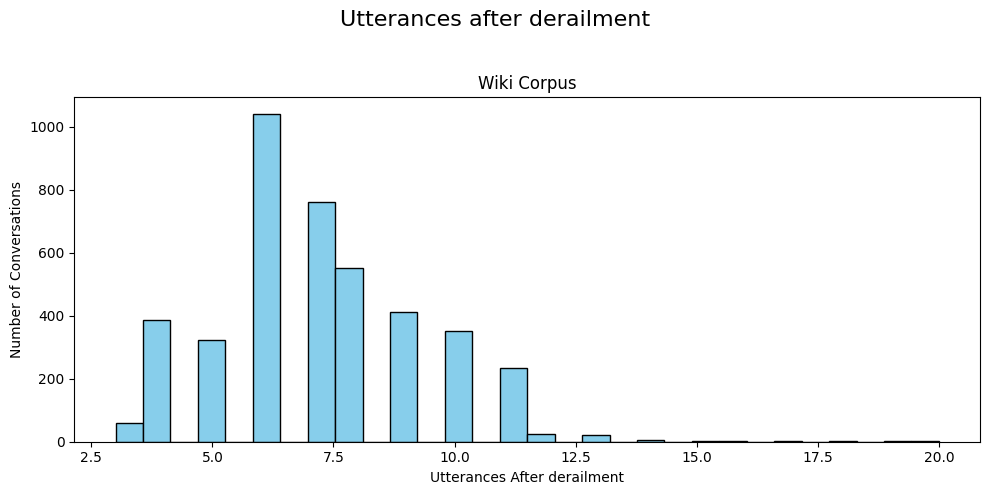

In [65]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
fig.suptitle("Utterances after derailment", fontsize=16)

len_after_derailement = []
for convo in wiki_corpus.iter_conversations(): 
    derailed_lengths = 0
    derail_flag =0
    for utt in convo.get_chronological_utterance_list():
        if derail_flag == 1:
            derailed_lengths +=1
        if utt.retrieve_meta("comment_has_personal_attack") == True:
            derail_flag = 1
    len_after_derailement.append(len(convo.get_utterance_ids()))
print(len(len_after_derailement))

axs.hist(len_after_derailement, bins=30, color="skyblue", edgecolor="black")
axs.set_title("Wiki Corpus")
axs.set_xlabel("Utterances After derailment")
axs.set_ylabel("Number of Conversations")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

2508


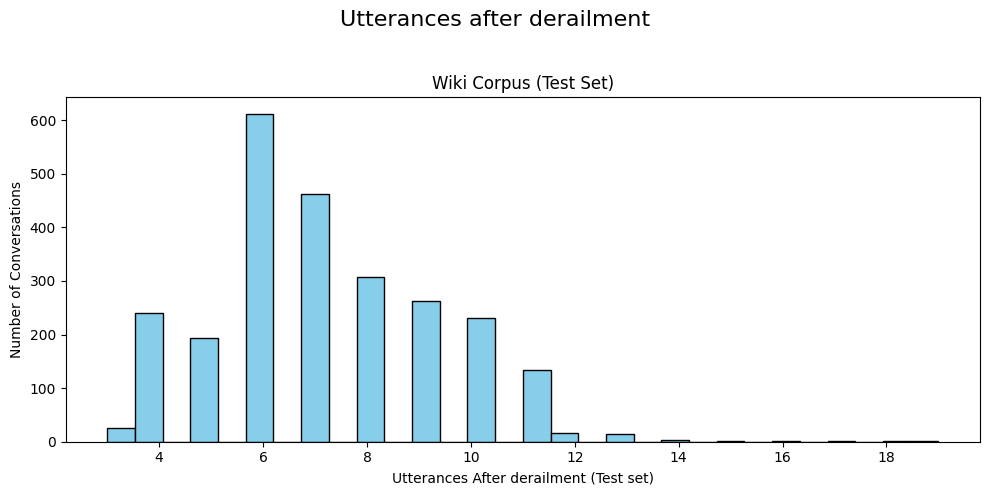

In [71]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
fig.suptitle("Utterances after derailment", fontsize=16)

len_after_derailement = []
for convo in wiki_corpus.iter_conversations(): 
    if convo.meta.get("split") != "train":
        continue
    derailed_lengths = 0
    derail_flag =0
    for utt in convo.get_chronological_utterance_list():
        if derail_flag == 1:
            derailed_lengths +=1
        if utt.retrieve_meta("comment_has_personal_attack") == True:
            derail_flag = 1
    len_after_derailement.append(len(convo.get_utterance_ids()))
print(len(len_after_derailement))

axs.hist(len_after_derailement, bins=30, color="skyblue", edgecolor="black")
axs.set_title(f"Wiki Corpus (Test Set)")
axs.set_xlabel("Utterances After derailment (Test set)")
axs.set_ylabel("Number of Conversations")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
display(cmv_corpus.print_summary_stats())
display(wiki_corpus.print_summary_stats())
display(test_corp.print_summary_stats())

Number of Speakers: 9548
Number of Utterances: 42964
Number of Conversations: 6842


None

Number of Speakers: 8069
Number of Utterances: 30021
Number of Conversations: 4188


None

Number of Speakers: 4214
Number of Utterances: 27498
Number of Conversations: 2107


None